# Data Gathering

In [1]:
# Import all libriaries and modules to to used in this project

import numpy as np
import pandas as pd
import requests
import os
import json
from sqlalchemy import create_engine

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)

In [3]:
# Load enhances Twitter archive file provided for the analysis in to archive
archive = pd.read_csv('twitter-archive-enhanced.csv')

# Check few lines of the dataframe
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [4]:
# Download image predictions file from Udacity using and save it locally using Request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content);

# Load the image prediction tsv file into a dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

# Check few lines of the dataframe
image_predictions.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [5]:
# Load Tweet JSON text file provided for those without Twitter API access and convert to a DataFrame
tweet_json = []

with open('tweet_json.txt', encoding='utf-8') as f:
    for t in f.readlines():
        t = json.loads(t)
        tweet_id = t['id']
        favorite_count = t['favorite_count']
        retweet_count = t['retweet_count']
        tweet_year = t['created_at'][-4:]
        tweet_month = t['created_at'][4:7]

        # Append to list of tweet info
        tweet_json.append({'tweet_id': tweet_id, 'favorite_count': favorite_count, 
                        'retweet_count': retweet_count,
                        'tweet_year': tweet_year, 'tweet_month': tweet_month})

# Store the relevent data from the tweet json text file into a DataFrame
tweet_json = pd.DataFrame(tweet_json, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'tweet_year', 'tweet_month'])

#Check few lines of the dataframe
tweet_json.head()

,tweet_id,favorite_count,retweet_count,tweet_year,tweet_month
0,892420643555336193,39467,8853,2017,Aug
1,892177421306343426,33819,6514,2017,Aug
2,891815181378084864,25461,4328,2017,Jul
3,891689557279858688,42908,8964,2017,Jul
4,891327558926688256,41048,9774,2017,Jul


# Assessing

In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
archive.duplicated().value_counts()

False    2356
dtype: int64

In [8]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
archive.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
5,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
6,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
7,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
8,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [10]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [19]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1659,811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
188,669371483794317312,https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg,1,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,Great_Pyrenees,0.729745,True,golden_retriever,0.237961,True,Labrador_retriever,0.020903,True
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False


In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   tweet_year      2354 non-null   object
 4   tweet_month     2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [23]:
tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [24]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,tweet_year,tweet_month
340,832215726631055365,0,10723,2017,Feb
1390,700062718104104960,2890,778,2016,Feb
550,804475857670639616,6886,2355,2016,Dec
2158,669567591774625800,248,61,2015,Nov
1679,681981167097122816,3043,1161,2015,Dec
2196,668815180734689280,610,291,2015,Nov
544,805826884734976000,7335,2132,2016,Dec
1700,680934982542561280,2285,497,2015,Dec
1302,707411934438625280,2486,673,2016,Mar
1364,702671118226825216,2398,634,2016,Feb


## Data Quality Issues Identified

**Archieve DataFrame**
1. Timestamp variable uses object datatype instead of datetime
2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have missing values
3. Some rating_denominator exceed 10 (some of which are really outrageous)
4. "None"is used to represent missing values in doggo, floofer, pupper, puppo, and name variables
5. Some dogs do not have stage categorization
6. Name of some dogs are not accurate
7. Dog names are not included in some tweets
8. A number of tweets are retweets

**Image Pedictions**
1. Some twitter arcieve data do not have accompaining image prediction data

## Data Tidiness Issues

1. All dog stages in archieve dataframe (doggo, floofer, pupper, puppo) should be a single variable
2. The three data should be a single dataset**

# Cleaning Data

In [25]:
# Create copies of dataset for cleaning

clean_archive = archive.copy()
clean_ip = image_predictions.copy()
clean_tjson = tweet_json.copy()

### Define

- Categorized dogs without stages as Unknown
- Replace missing dog names with "Unknown Dog"

### Code

In [26]:
def unknown_stage(row):
    if row['doggo'] == "None" and row['floofer'] == "None" and row['pupper'] == "None" and row['puppo'] == "None":
        return "Unknown"
    else:
        return "None"

clean_archive["unknown"] = clean_archive.apply(unknown_stage, axis=1)

In [27]:
clean_archive.name = clean_archive.name.replace(np.NaN, 'Unknown Dog')

### Test

In [28]:
clean_archive.shape

(2356, 18)

In [29]:
clean_archive.unknown.value_counts()

Unknown    1976
None        380
Name: unknown, dtype: int64

### Define

- Replace all "None" used to represent missing values in doggo, floofer, pupper, puppo, unknown, and name variables
- Replace all rating denominators less than or greater than 10 with 10

### Code

In [30]:
# Replace all 'None' in doggo, floofer, pupper, puppo, name, and unknown columns with NaN
clean_archive.doggo = clean_archive.doggo.replace('None', np.NaN)
clean_archive.floofer = clean_archive.floofer.replace('None', np.NaN)
clean_archive.pupper = clean_archive.pupper.replace('None', np.NaN)
clean_archive.puppo = clean_archive.puppo.replace('None', np.NaN)
clean_archive.name = clean_archive.name.replace('None', np.NaN)
clean_archive.unknown = clean_archive.unknown.replace('None', np.NaN)

#Convert all denominators to 10 standard
clean_archive.loc[clean_archive['rating_denominator'] > 10, 'rating_denominator'] = 10
clean_archive.loc[clean_archive['rating_denominator'] < 10, 'rating_denominator'] = 10

### Test

In [31]:
clean_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,unknown
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,Unknown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,Unknown
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,Unknown


In [32]:
clean_archive.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define

- Melt all dog stages (doggo, floofer, pupper, puppo, unknown) into a single variable

### Code

In [33]:
clean_archive = pd.melt(frame=clean_archive, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], var_name='stages', value_name='dog_stage')

In [34]:
clean_archive.drop(['stages'], axis=1, inplace=True)
clean_archive.dropna(subset=['dog_stage'], inplace=True)

In [35]:
clean_archive = clean_archive.drop_duplicates(subset='tweet_id', keep="first")

### Test

In [36]:
clean_archive.shape

(2356, 14)

In [37]:
clean_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo


### Define

- Combine all three dataset into a single dataset since they all are talk about the same observational unit

### Code

In [38]:
#data = [clean_archive, clean_ip, clean_tjson]
master_data = pd.merge(clean_archive, clean_ip, on='tweet_id', how='left')
master_data = master_data.merge(clean_tjson, on='tweet_id', how='left')

#### Test

In [39]:
master_data.shape

(2356, 29)

In [40]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  dog_stage                   2356 

### Define

- Remove retweets and tweets without images from the master dataframe

### Code

In [41]:
master_data.drop(master_data[master_data['retweeted_status_id'] >= 1].index, inplace = True)
master_data.dropna(subset=['img_num'], inplace=True)

In [42]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1448 non-null   object 
 13  dog_stage                   1994 

### Define

- Drop all uneccessary columns from dataframe and keep only those with data useful for performing analysis
- Add a dog rating column in which the ratio of the rating numerator and denominator are calculated

### Code

In [43]:
# Add a dog rating column
master_data["dog_rating"] = master_data.rating_numerator / master_data.rating_denominator

In [44]:
#Drop all unneccessary columns from dataframe
master_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

### Test

In [45]:
master_data.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,tweet_year,tweet_month,dog_rating
0,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,1.0,Pembroke,0.511319,True,32467.0,7711.0,2017,Jul,1.4
1,884162670584377345,2017-07-09 21:29:42 +0000,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,12,10,Yogi,doggo,1.0,German_shepherd,0.707046,True,20771.0,3128.0,2017,Jul,1.2


### Define

- Change timestamp variable from object datatype datetime
- Change rating numerator variable from integer datatype float
- Correct all other wrong datatypes resulting from merged dataset

### Code

In [46]:
master_data['timestamp'] = pd.to_datetime(master_data['timestamp'])
master_data['rating_numerator'] = master_data['rating_numerator'].astype(float)
master_data['favorite_count'] = master_data['favorite_count'].astype(int)
master_data['retweet_count'] = master_data['retweet_count'].astype(int)
master_data['img_num'] = master_data['img_num'].astype(int)

### Test

In [47]:
master_data.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
text                               object
rating_numerator                  float64
rating_denominator                  int64
name                               object
dog_stage                          object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                             object
favorite_count                      int64
retweet_count                       int64
tweet_year                         object
tweet_month                        object
dog_rating                        float64
dtype: object

# Storing

In [48]:
master_data.to_csv('twitter_archive_master.csv', index=False)

In [49]:
# Create SQLAlchemy Engine and empty twitter_archive_master database
database = create_engine('sqlite:///twitter_archive_master.db')

In [50]:
# Store cleaned master DataFrame ('master_data') in a table called master_data in twitter_archive_master.db
master_data.to_sql('master_data', database, index=False)

# Analyzing and Visualizing Data

In [51]:
master_data.groupby(['dog_stage']).dog_rating.mean()

dog_stage
Unknown    1.249585
doggo      1.178378
floofer    1.200000
pupper     1.071429
puppo      1.200000
Name: dog_rating, dtype: float64

In [52]:
master_data.groupby(['dog_stage']).favorite_count.mean()

dog_stage
Unknown     8478.924763
doggo      18881.932432
floofer    13206.000000
pupper      7197.738916
puppo      21582.090909
Name: favorite_count, dtype: float64

In [53]:
master_data.groupby(['dog_stage']).retweet_count.mean()

dog_stage
Unknown    2577.957346
doggo      6868.905405
floofer    4968.714286
pupper     2363.581281
puppo      6473.954545
Name: retweet_count, dtype: float64

In [54]:
master_data.p1_dog.value_counts() / master_data.p1_dog.count() * 100

True     74.072217
False    25.927783
Name: p1_dog, dtype: float64

In [55]:
master_data.groupby(['tweet_month']).tweet_id.count()

tweet_month
Apr     95
Aug     61
Dec    421
Feb    175
Jan    235
Jul    137
Jun    125
Mar    168
May    100
Nov    349
Oct     65
Sep     63
Name: tweet_id, dtype: int64

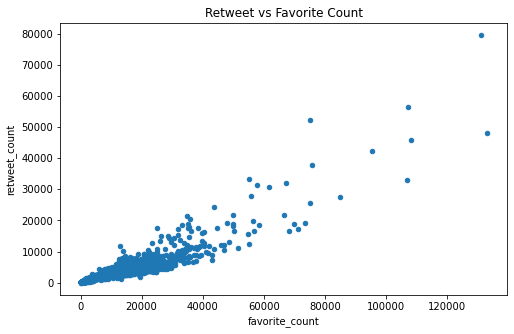

In [56]:
master_data.plot.scatter('favorite_count', 'retweet_count', figsize= (8, 5), title='Retweet vs Favorite Count');

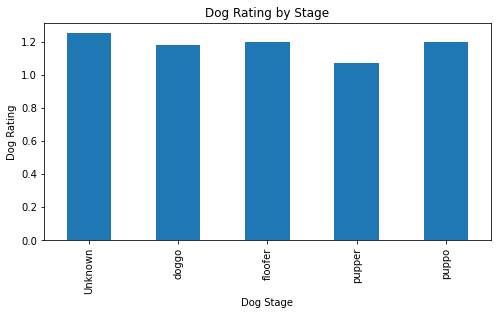

In [57]:
master_data.groupby(['dog_stage']).dog_rating.mean().plot (kind='bar', figsize= (8, 4), xlabel='Dog Stage', ylabel='Dog Rating', title='Dog Rating by Stage');

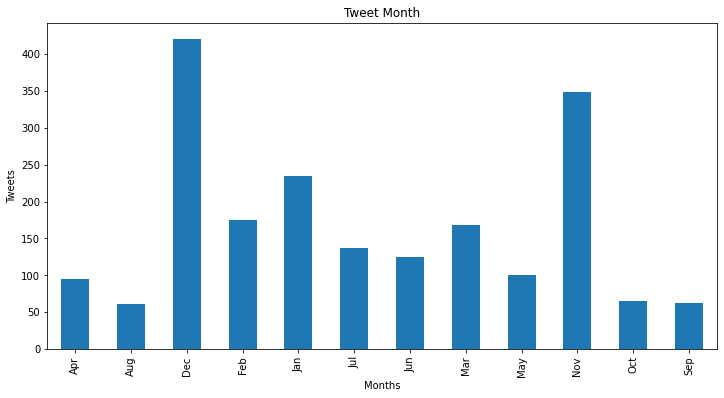

In [58]:
master_data.groupby(['tweet_month']).tweet_id.count().plot (kind='bar', figsize= (12, 6), xlabel='Months', ylabel='Tweets', title='Tweet Month');